<a href="https://colab.research.google.com/github/maxbentley/datasciencefund/blob/main/Unit2/Max_Bentley_Unit2NotesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following are the installations and libraries neccesary to run the code in these notes. Some of the libraries in this course are so new that they aren't preinstalled on the Google servers that collabratory runs on. We'll need to reninstall them each time we get the "runtime disconnect message"

In [ ]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.3/505.3 kB 27.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [ ]:
#We'll also need to re-import this library after we reinstall it

import preliz as pz

In [ ]:
#These libraries don't need to be reinstalled each time, but they will need to be
#re-imported each time

import numpy as np
import arviz as az
import pymc as pm

#**Unit 2: Probability with a Pinch of Python**

We will spend this entire unit trying to answer a single question: What will Victor Wembanyama's true Free Throw percentage (FT%) be in the NBA?

This will acomplish three things:

1. Give you a foundation upon which to grow your inuition about probability and predictive models.
2. Show you that any question about the real world can be made arbitrarily complicated.
3. Help emphasize that there are always many ways to answer a question.

Here's a word salad of things you'll learn in this unit: mean, mode, median, the three axioms of probability, Bayes' Rule, prior, likelihood, posterior,  probability denisty function, uniform distribution, beta distribution, and binomial distribution.

We will also introduce the most basic version of a pymc model, a code skeleton from from which we will summon many predictive monsters in the coming units.

Let's dive in.

###**Free Throws**

Victor Wembanyama is a profesional basketball player for the San Antonio Spurs NBA team. In the summer of 2023, Wembanyama had yet to play a game in the NBA, although he had played in other professional leagues in France.

There was a lot of hype around how good a player Wembanyama would be in the NBA, and many questions, one of which was: How good would Victor Wembanyama be at shooting the basketball?

One metric to use is Free Throw Percentage (FT%). In basketball, players are awared an unobscured attempt to toss a basketball into a hoop (the main goal of the game) under certain condtions. All free throws are shot from the same spot, and players either make of miss the shot. Made free throws award the player's team 1 point, and missed free throws award 0 points.

###**Assumptions: Modeling Free Throws Prior Information**
Let's try to figure out what Victor Wembanyama's free throw percentage will be in the NBA.

First, let's acknowledge that we **must** make an assumptions in order to make a guess. We'd *have* to make an assumption, even if only to assume that every possible free throw percentage is equally likely.

**Task1**: So, what is Wembanyama's most likely free throw percentage, if all possible free throw percentages are equally likely and we otherwise know nothing about Wembanyama or free throws?

**Answer1**:

**There is no "most likely" free throw percentage - each free throw percentage is equally likely. The median is 50% though.**

Below is a graph showing every possible free throw percentage on the x-axis. The y-axis goes from $0$ to $1$, and the blue line happens to be at $y=1$. The blue line is horizontal to represent that each x value, or proportion, is equally likely.

Don't worry about understanding this graph or the code that generated it right now. It's here for when you reference these notes later.

<Axes: >

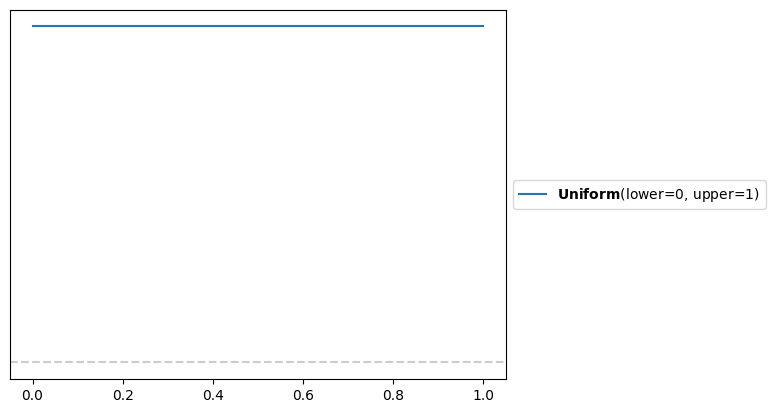

In [ ]:
pz.Uniform(0,1).plot_pdf() # plots the uniform distribution

In order to predict free throw percentage, we had to make an asumption.

It turns out that assumptions are required for more than predicting free throw percentage--**assumptions are required to predict/guess anything uncertain**.
All of reality, and everything in it, is at least functionally uncertain (...probably...). Therefore, we need to make assumptions in order to make any logical statements about the state of the world we live in.

Instead of worrying about the world and all reality, let's go back to predicting free throw percentage.

Since we had to make an assumption to get an answer, let's see if we can do better than "all possible answers are equally likely." What do we know about Wembanyma's free throw shooting?


Wembanyama played professionally in the Euroleague, and he made 24 out 32 free throws or $\frac{24}{32}=0.75$ free throws. You may be tempted to say the expected proportion of made free throws is $0.75$--and it is--but only reporting that is throwing away information.
For example, $\frac{24}{32}=\frac{3}{4}$, but Wembanyama didn't shoot just 4 free throws, he shot 32. We need a way to show that seeing the outcome of more free throws increases how confident we are in our estimate.

**Task2**:

In order to do that, we're gonna need to do some math. Not calculations (those are for your computer), rather, we'll redefine a free throw into its relevant, logical parts.

What about a free throw are we recording? In other words, what about a free throw do we care about?

**Answer2**:

**We care about the result of the free throw and the total number of free throws shot. We also care about the fact that each free throw is independent from one another.**

Before we go further, we know to define 'uncertainty' the way we defined free throws: by breaking uncertainty into its relevant, logical parts.

Also, instead of the word 'uncertainty', we'll use the word 'probability'.

**Task3**:

Take a moment to think about what "probablity" means.

Ask at least one other person what they think it means.

Write your definition, and at least one other person's definition. Pick which one you like best, or make a new definition that combines the two.

**Answer**:

My definition: Probability - the chance of a certain event occurring over a long period of time.

Aubrey's answer - The likelihood that a given event will occur.

Combined definition: The likelihood that a given event occurs over a period of time.

Now that we know what a probablity is, we can use those 24 out of 32 free throws we've "seen" Victor Wembanyama shoot.

Each of those 32 free throw attempts had some probability of going through the hoop and generating a point. We'll call that probability $\theta$ (pronouced "theta") since we don't know what it is, and because greek letters make me feel like I'm a real mathematician.

Since Wembanyama made 24 made free throws, we have 24 $θ$s, and we'll call each of the 8( = 32 - 24) misses $1-θ$.

As a reminder, those 32 free throw attempts are helping us form an assumption about the probability of Wembanyama's free throw percentage being any particular number. Before, we said it was euqally likely to be any possible free throw percentage.

One more notational thing: let $p()$ read "the probability of ___". Thus, $p(\theta)$ reads "the probability of the true probability of Victor Wembanyama making a free throw".

Returing to the "equally likely" assumption, we basically said $p(θ) ∼ Uniform(0,1)$ or $p(θ) \sim U(0,1)$. This reads "the true probability of Victor Wembanyama making a free throw is uniformly distributed within the interval 0 to 1".


**Task4**:

Guess how we could write the distribution of the true probability of Wembanyama making a free throw, but now with the prior knowledge that he made 24 out of 32 free throws in Euroleage play.

**Answer4**:

p(8 - 8θ)


<Axes: >

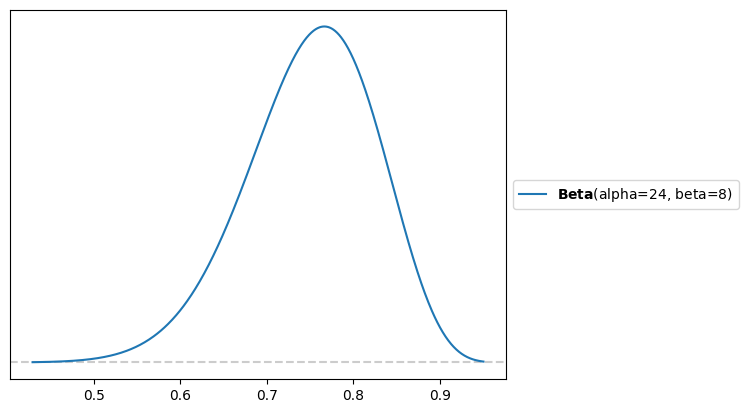

In [ ]:
#plotting the beta distribution with shape parameter 24 and scale parameter 8
pz.Beta(alpha=24,beta=8).plot_pdf()

**Task5**:

Which prior distribution is better, the $Beta(α=24, β=8)$ distribution, or the $U(0,1)$ distribution.

Why?

**Answer5**:

The beta distribution. This is because the beta distribution takes into account Wembanyama's previous free throw percentage and the number of attempts, which is more tailored to Wembanyama than the assumption that each % is equally likely.

###**Predictions with only prior knowledge**

Recall that we wanted to predict Victor Wembanyama's free throw percentage. While there are technically infinte guesses we could make--any percentage under the blue curve above is valid--we now have a precise way of saying what the expected/average free throw percentage is, and the the most likely/probable free throw percentage. Also try to find the "middle" percentage, AKA the median.



**Task6**:

Find Wembanyama's expected FT%, middle FT%, and most likely FT% based only on the free throws he shoot in Euroleage

In [ ]:
#ANSWER6

# Expected FT% is mean, middle FT% is median, most likely FT% is mode
cool = pz.Beta(alpha=24,beta=8)

print("expected:", cool.mean(), ". middle:", cool.median(), ". most likely:", ((cool.alpha - 1)/(cool.alpha + cool.beta - 2))) # mode code was shamelessly copied + modified from the notes. sue me

expected: 0.75 . middle: 0.7552582743060792 . most likely: 0.7666666666666667


**Answer6**:

[*or write some of your answer here*]

###**Acknowledging our Observations: Modeling Free Throws from the NBA**

In this section, we will learn a rule for how to change our predictions as we gain more information, or data.

For now, that new information will be "seeing" Victor Wembanyama shoot free throws in an NBA game.

Right now, we have a prior, $p(θ) = Beta(α=24, β=8)=\frac{Γ(α+β)}{Γ(α)Γ(β)}θ^{α-1}(1-θ)^{β-1}=\frac{31!}{23!7!}θ^{23}(1-θ)^{7}$

This represents that we don't know Wembanyama's true free throw percentage, but we do know he made 24 out of 32 free throws in Euroleague basketball. Specifically, $θ$ represents his true chance of making a free throw.



Put that aside for now. Consider this information, or these data: we observe Wembanyama make 7 out 9 free throws in his first 2 NBA games. Let's consider the chance, or likelihood, of this happening.

Made free throws are represented by $θ$, and misses by $1-θ$. Because free throws are independent, we can again represent a bunch of makes and misses through multiplication.

**Task7**:

Write down an expression for the likelihood of seeing these data (7 made free throws out of 9) given we knowthe true free throw rate $θ$.

**Answer7**:

9!/(7!*2) * (θ^6) * (1-θ)

We've seen preliz's function for our prior in this scenario, $Beta(α,β)$. Preliz also has a nice function for the binomial distribution, shown below:

<Axes: >

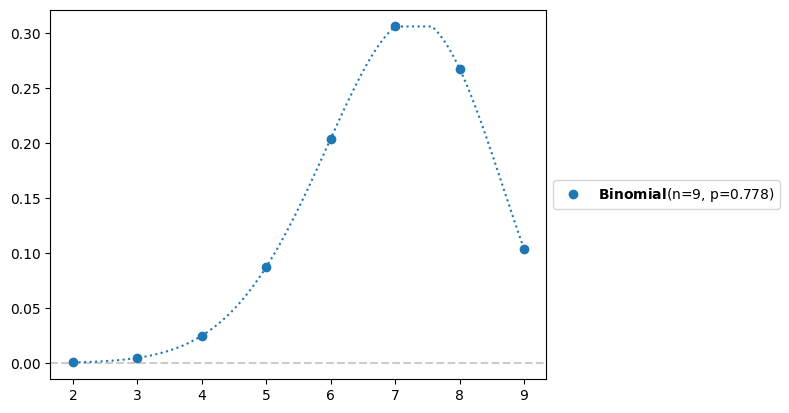

In [ ]:
pz.Binomial(n = 9, p = 7/9 ).plot_pdf()

###**Updating our Predictions/Beliefs**

Let's review what we've learned.:

- We have a formula for our **prior** knowledge about Wembanayma's free throw shooting from his play in Euroleague, $p(θ) = Beta(α=24, β=8)=\frac{31!}{23!7!}θ^{23}(1-θ)^{7}$. (This prior is our way to guess before we've seen any anything about the NBA.)
- We have a formula for the **likelihood** that Wembanyama made 7 out of 9 free throws in his first two NBA games, $p(y|θ)=Binomial(n=9,k=7,θ)=\frac{9!}{(9-7)!7!}θ^{7}(1-θ)^{2}$

and also what we want:

- A prediction of Wembanyama's true free throw percentage in the NBA, $θ$, given that we've seen him make 7 out of 9 free throws in the NBA,  $p(θ|y)$. This prediction is **post**, or after, seeing data and making assumptions.



Thus far, when we have two probablities that happen in conjunction, we have multiplied them. That trend will continue here.

**Task8**:

Write a formula for knowing both the likelihood and the prior in this free throw example.


**Answer8**:

beta(31, 10)

We now have our answer--or at least, a formula for getting one.

The probability of Victor Wembanayma's true free throw percentage in the NBA given the free throws we've seen him shoot thus far is:

$p(θ|y) ∝ p(y|θ)p(θ) = Beta(α_{new}=α+k,β_{new}=n-k+β)$

The $∝$ reads "proportional to". Its a statement we use instead of an equal sign that allows us to drop the scracy fractions. Those "scary fractions" will get subsumed into a [normalizing constant](https://en.wikipedia.org/wiki/Normalizing_constant#:~:text=In%20probability%20theory%2C%20a%20normalizing%20constant%20is%20a%20constant%20by,or%20a%20probability%20mass%20function.). More on that later, but for now, all you need to know is this:

The models we create need to know about $θ$--the thing we want to predict--and how $θ$ intereacts with the world. Our computer is capable of handling the rest.

**Task9**:

Now that we have a formula, let's use our computer to answer our question: "What do we expect Victor Wembanyama's true free throw percentage to be?"

*Hint*: Is there code on elsewhere on this notebook for the Beta distribution?

In [ ]:
#ANSWER9

analytic_FT = pz.Beta(alpha=31, beta=10)

While that constitutes our best guess, the 'real' answer is the whole distribution, shown below

<Axes: >

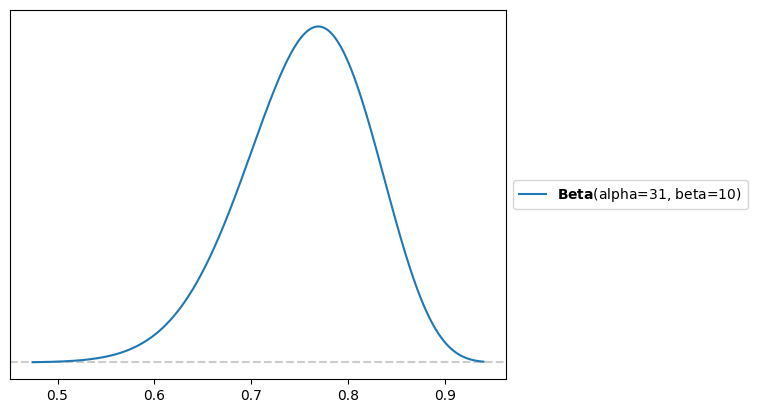

In [ ]:
#this will only run based on code from the answer key, and is mainly here to
#give you a hint at how to answer the pervious task
analytic_FT.plot_pdf()

Let's linger on my last statement:

"the 'real' answer is the whole distribution"

**Task10**:
Why is the whole distribution better than a single point estimate, a single guess?

**Answer10**:

The distribution is better than a single guess because it emphasizes the fact that we do not yet know Wemby's true free throw percentage, and while our priors are made more accurate with the new information, we don't yet know the full story.

Now that we have some inuition and skills on how to guess Wembanyama's FT%, a natural extension is to wonder if we can predict the results of his actual free throws.

###**Probabalistic Programming: Predicting Free Throws**

This is where things get interesting.

There is an analytic (formulaic and exact) solution to predicitng Wembanyams's future free throws, but we won't use it here for two reasons.
- It involves calculating this integral: $ \int_{}^{} p(\tilde{y}|θ)p(θ|y) \,dθ  $, where $\tilde{y}$ is predicted data, or, in this case, predicted free throws.
- The approximate, or sampling, method we'll use instead will work even in situations where that integral is intractable.


 To avoid ever having to calculate that integral, we will need to make use of a powerful technique known as Markov Chain Monte Carlo (MCMC). Eventually we will cover a version of MCMC in more depth, but even then, we will not cover precisely what's happening underneath the hood with pymc.

 pymc is the library of functions we'll use to build our model, and it will underpin every model we'll build going forward. Imagine its like a car. Cars have all sorts of features now a days, from power steering and automatic transmission, to blind spot warnings and lane assist. They can't quite drive themselves yet, but even if they could, there's nothing stopping us from manually driving one off a cliff, warning lights be damned.

 We will learn how to avoid using our model to drive ourselves off a cliff, and we will also learn how to make use of its fancy bells and whistles. Hopefully, this will be just as empowering as getting behind the wheel. Like a car has a complicated engine powering its capabilites, a pymc model has a complicated MCMC engine powering its capablities, and you don't really need to know how either work to take it for a drive.

**But remember**: Things will break.
This course will teach you how to drive, not how to be a mechanic. Often there are warning lights to help with this, but sometimes not--and there's no warning light in the world that can protect you from yourself.

Let's return to coding.

Before we make any predictions about future FTs, we need to redo our entire anaylsis with a library called pymc.

In [ ]:
#loading pymc, the fancy library of functions that allows us to only focus on θ
#we already did this at the beginning of the notebook, but I put it here again
#to emphasize that this is the first time we're using it
import pymc as pm

In [ ]:
#the makes we've seen from the NBA
FT_makes = np.repeat(1, 7)

#the misses we've seen from the NBA
FT_misses = np.repeat(0, 2)

#combine makes and misses into one array
FT_data = np.concatenate( [FT_makes,FT_misses] )

#the last three lines can be combined into one line
#FT_data = np.repeat([1,0], repeats = [7,2])
#Which method of making FT_data is easier to understand?

In [ ]:
#Nearly every single model we will build in this class will have
#the below outline as its foundation. Get hyped.

with pm.Model() as wmby_FT_model:
  #we define our prior with the makes and misses from Euroleague
  #notice how we make alpha and beta floats by using '.'
  θ = pm.Beta('θ' , alpha = 24. , beta = 8.)

  #we define our likelihood, which is how we process the free throws
  #we've seen Wemby make in the NBA
  #Think of Bernoulli as a stand in for the binomial distribution
  #This allow us to predict one free throw at a time later, among other things
  y = pm.Bernoulli('y', p = θ, observed = FT_data)

  #this part is new. We sample from our posterior because we don't actually
  #have a formula for it.
  idata_FT = pm.sample(1000)


The last line of code in the previous code block draws 1000 $θ$s for us to play with. What does that mean? Let's start with a picture:




In [ ]:
#arviz is a companion data visualization library for pymc. Again, we already
#imported this library, but its repeated here for emphasis.
import arviz as az

<Axes: title={'center': 'θ'}>

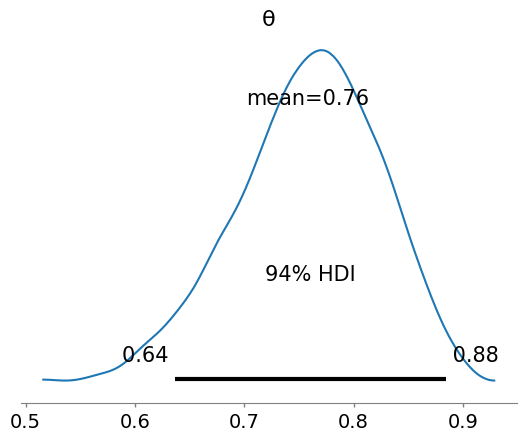

In [ ]:
#vizualize the 1000 samples from the pymc model of the posterior
az.plot_posterior(idata_FT)

Let's compare this to the analytic solution.

0.7602926380970217

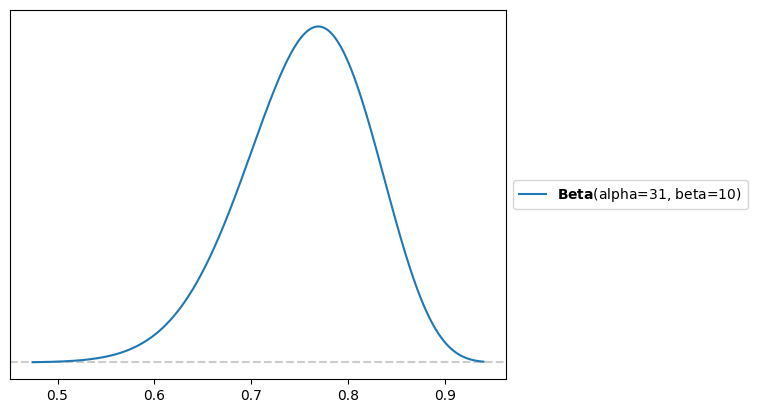

In [ ]:
#probability density function (pdf) of the analytic solution
analytic_FT.plot_pdf()
analytic_FT.median()

**Task11**:

List similarities and differences between the pymc model's samples, and the analytic model's pdf. Discuss these with at least one other person

**Answer11**:

The pymc model's samples are basically random simulations of the model 1000 times, and then distributed based on how the samples result. This makes the graph less exact, because the graph is centered around the results of the random distribution. The pdf is more exact because it is the true distribution given our information.

To see why this is the case, let's draw 1000 sample FT%s from the analytic model, just like we did from the pymc model.

<Axes: title={'center': 'θ'}>

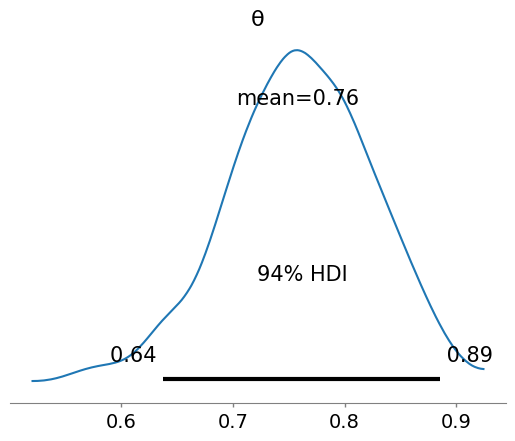

In [ ]:
#vizualize 1000 samples from the analytic model.
#Recall that analytic_FT = pz.Beta(alpha = alpha_old + 7,beta = beta_old + n - k )
#This is beta dist. with the total number of makes and total misses as parameters
az.plot_posterior( {'θ' : analytic_FT.rvs(1000)} )

**Task12**:

List similarities and differences between the pymc model's samples, and the analytic model's samples. Discuss these with at least one other person

**Answer12**:

Like the pymc model, the analytic model's mean is 75% and has a 94% HDI. It also has roughly the same shape as the other model. However, because the results of each individual test are different, the individual small peaks and valleys are different.

Now that we have some idea what our fancy pymc model gives us, let's use our it to make predictions.

In [ ]:
#The below function needs to know two things in order to make predictions:
#-the samples from the posterior; these are stored in idata_FT
#-the model that generated those samples, which we called wmby_FT_model
# The last input tells the function to store those predictions in idata_FT

pm.sample_posterior_predictive(idata_FT, model=wmby_FT_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

**Task13**:

Does our model predict that Wembanyama will make his next free throw?

Use the output above.

Hints: We need the posterior predictive distribution. Also, what symbol/name did we give our data, our likelihood when we created wmby_FT_model?

In [ ]:
#ANSWER13

stacked_FTs = az.extract(idata_FT, group="posterior_predictive")

stacked_FTs.sel(sample=0).sel(draw=0).y.to_series().values

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

**Answer13**:

It does!!!!

###**Predicting  Wemby FT in 2024/2025**

Victor Wembanyama played more than 2 games in the NBA last year--and more relevantly to us, he took more than 9 free throws. In fact, he made 292 out of 367 free throws in the 2023/2024 NBA season.


As of this writing, the 2024/2025 NBA season has yet to occur, but we can use those 367 FT attempts to generate

In [ ]:
#Wemby's FTs in the 2023/2024 season, makes then misses
FT_data_2324 = np.repeat([1,0], repeats = [292,75])

In [ ]:
with pm.Model() as wmby_FT_2324_model:
  #same prior from before based on Euroleague data
  θ = pm.Beta('θ' , alpha = 24. , beta = 8.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_FT_2324 = pm.sample(2000)

<Axes: title={'center': 'θ'}>

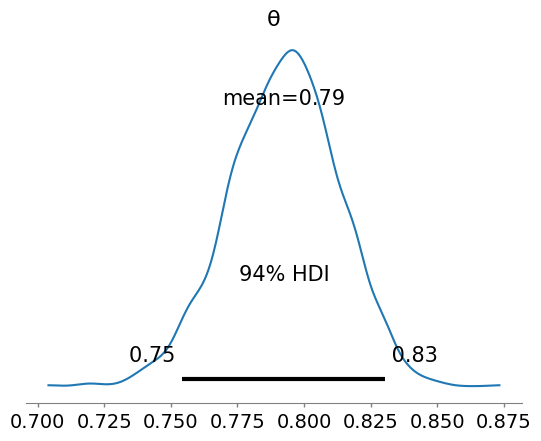

In [ ]:
#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(idata_FT_2324)

In [ ]:
#Generate the actual predictions for Wemby's next 2000 FTs
pm.sample_posterior_predictive(idata_FT_2324, model=wmby_FT_2324_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [ ]:
#stack the two MCMC chains together
stacked_FT_2324 = az.extract(idata_FT_2324, group="posterior_predictive")

In [ ]:
#idata_FT_2324.posterior_predictive.y.to_series().values
stacked_FT_2324.sel(sample=0).sel(draw=0).y.to_series().values

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

And there you have it, predictions for Wembanyama's next 367 free throws. We'll check this at the end of the NBA regular season this year, and see how our model did.

**Task14**:

What could we do to improve our model?

**Answer14**:

Break up free throws by game

###**Summary**

In this unit, we answered the question: What will Victor Wembanyama's true Free Throw percentage (FT%) be in the NBA?

We did this by considering prior knowledge we had about Wembanyama's FT shooting--we landed on his previous FT shooting in Euroleague, although we proposed other valid assumptions.

In writing down our assumptions, we found it necceesary to think mathematically about probability and the physical act of FT shooting. This led us to probability density functions (pdf) as a good summary of our knowledge.

We noticed that we could alter our assumption by processing new information through with a likelihood, another pdf.

We then combined our new information with our prior knowledge by multipying our pdfs. This gave us a way to make a guess post new information, and we called this a posterior.

And this posterior *is* our answer. It can give us different precise estimates, like the mean, median, and mode, and gives us a probability for all the values Wembanyama's truw FT% could be.

But we didn't stop there! Our analytic solution happened to work out well mathematically, but we want a tool that works nearly everytime.

So, we took out a pymc model for a test drive. We played a bit with its many metaphorical knobs and buttons to get predictions for Wembanyama's future FTs.

Along the way, we learned that models like pymc guranttee that we will nearly always have access to samples of a posterior--so long as we use our tools correctly.

To wrap up this unit, let's end with a final task:





**Task15**:

What is Victor Wembanyama's true Free Throw percentage (FT%) in the NBA?

**Answer15**:

Wembanyama's true FT% is 76%, because that is the median FT% in the "true" graph.